# 0. Setup

## 0.1 Install module

In [2]:
! pip3 install pandas

In [3]:
! pip3 install matplotlib

In [4]:
! pip3 install openpyxl

In [5]:
! pip3 install --upgrade pip

In [6]:
! pip install --upgrade openpyxl

## 0.2 Import the required packages

In [7]:
import IPython
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Load the location of data
data_dir = os.path.join(os.getcwd())
data_dir

'/Users/daikexin/Desktop/Thesis/DATA'

In [9]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

# 1. Validate with one file

## 1.1 Import internal metadata

In [10]:
# Construct the correct file path
file_path = os.path.join(data_dir, "former_internal_metadata", "metagenomes", "Illumina", "Alpine-type_cheese_PRJNA962271_manual_metadata_metagenomes_illumina.tsv")
file_path

'/Users/daikexin/Desktop/Thesis/DATA/former_internal_metadata/metagenomes/Illumina/Alpine-type_cheese_PRJNA962271_manual_metadata_metagenomes_illumina.tsv'

In [33]:
# Try reading with 'ISO-8859-1' encoding (commonly used for European characters)
df_meta = pd.read_csv(file_path, sep='\t', encoding='ISO-8859-1', skip_blank_lines=True)
df_meta.head()

,Run ID,Internal ID,Host genome ID1,Host genome ID2,Missing genome count,Food common name,Food subgroup,Food matrix,Food components,Publication,Time series,Experimental food,Sequence type,Starter culture metagenome,Starter culture,Virome nucleic acid,Associated starter culture run ID,Continent,Continent code,Region,Region code,Subregion,Subregion code,Country,Country code,Latitude,Longitude,Collection date,Additives,Fermentation medium,Fermentation pH,Fermentation temperature,Fermentation time,Fermentation vessel,Microbial starter inoculation,Microbial starter preparation,Microbial starter source
0,SRR24358884,NaN,GCF_002263795.3,GCA_021347905.1,NaN,Alpine cheese,Cheese,Solid,Cow milk,https://dx.doi.org/10.2139/ssrn.4332994,False,False,metagenome,False,True,NaN,NaN,Americas,19,Northern America,21,NaN,NaN,United States of America,840,39.96,-83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Show column names and their data types
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Run ID                             1 non-null      object 
 1   Internal ID                        0 non-null      float64
 2   Host genome ID1                    1 non-null      object 
 3   Host genome ID2                    1 non-null      object 
 4   Missing genome count               0 non-null      float64
 5   Food common name                   1 non-null      object 
 6   Food subgroup                      1 non-null      object 
 7   Food matrix                        1 non-null      object 
 8   Food components                    1 non-null      object 
 9   Publication                        1 non-null      object 
 10  Time series                        1 non-null      bool   
 11  Experimental food                  1 non-null      bool   
 12

## 1.2 Validate food category

In [13]:
# Validate food category
# List of food subgroups according to FermDB
food_subgroups = [
    'acid beverage', 'alcoholic beverage', 'beer', 'cheese', 'dairy product', 
    'fermented cereal', 'fermented fish', 'fermented fruit', 'fermented legumes', 
    'fermented meat', 'fermented roots', 'fermented vegetables', 'wine'
]

In [14]:
# Filter rows where 'Food subgroup' is not in the list, converting the text to lowercase
df_meta[~df_meta['Food subgroup'].str.lower().isin([x.lower() for x in food_subgroups])]

,Run ID,Internal ID,Host genome ID1,Host genome ID2,Missing genome count,Food common name,Food subgroup,Food matrix,Food components,Publication,Time series,Experimental food,Sequence type,Starter culture metagenome,Starter culture,Virome nucleic acid,Associated starter culture run ID,Continent,Continent code,Region,Region code,Subregion,Subregion code,Country,Country code,Latitude,Longitude,Collection date,Additives,Fermentation medium,Fermentation pH,Fermentation temperature,Fermentation time,Fermentation vessel,Microbial starter inoculation,Microbial starter preparation,Microbial starter source


## 1.3 Validate country and region information

In [46]:
# Load M49 data
df_m49 = pd.read_csv(f'{data_dir}/Map/UNSD_m49.csv', delimiter=';')
df_m49.head()

,Global Code,Global Name,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS)
0,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Algeria,12,DZ,DZA,NaN,NaN,NaN
1,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Egypt,818,EG,EGY,NaN,NaN,NaN
2,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Libya,434,LY,LBY,NaN,NaN,NaN
3,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Morocco,504,MA,MAR,NaN,NaN,NaN
4,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Sudan,729,SD,SDN,x,NaN,NaN


In [ ]:
# Convert the code columns to integers
cols_to_fix = ['Global Code', 'Region Code', 'Sub-region Code', 'M49 Code']
df_m49[cols_to_fix] = df_m49[cols_to_fix].astype(pd.Int64Dtype())  # Keeps NaN values if any exist

,Global Code,Global Name,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS)
0,1,World,2,Africa,15,Northern Africa,NaN,NaN,Algeria,12,DZ,DZA,NaN,NaN,NaN
1,1,World,2,Africa,15,Northern Africa,NaN,NaN,Egypt,818,EG,EGY,NaN,NaN,NaN
2,1,World,2,Africa,15,Northern Africa,NaN,NaN,Libya,434,LY,LBY,NaN,NaN,NaN
3,1,World,2,Africa,15,Northern Africa,NaN,NaN,Morocco,504,MA,MAR,NaN,NaN,NaN
4,1,World,2,Africa,15,Northern Africa,NaN,NaN,Sudan,729,SD,SDN,x,NaN,NaN


In [38]:
df_m49.head()

,Global Code,Global Name,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS)
0,1,World,2,Africa,15,Northern Africa,NaN,NaN,Algeria,12,DZ,DZA,NaN,NaN,NaN
1,1,World,2,Africa,15,Northern Africa,NaN,NaN,Egypt,818,EG,EGY,NaN,NaN,NaN
2,1,World,2,Africa,15,Northern Africa,NaN,NaN,Libya,434,LY,LBY,NaN,NaN,NaN
3,1,World,2,Africa,15,Northern Africa,NaN,NaN,Morocco,504,MA,MAR,NaN,NaN,NaN
4,1,World,2,Africa,15,Northern Africa,NaN,NaN,Sudan,729,SD,SDN,x,NaN,NaN


In [41]:
# Step 0: Helper function to check for NaN equality (for Subregion code and Subregion)
def nan_equal(val1, val2):
    return pd.isna(val1) and pd.isna(val2) or val1 == val2

# Step 1: Iterate over each row of the df_meta and compare with df_m49
def check_discrepancies(meta_row, m49_df):
    # Find the matching row in df_m49 for the Country
    matched_row = m49_df[m49_df['Country or Area'] == meta_row['Country']]
    
    if matched_row.empty:
        return None  # No match found for the Country
    
    # Step 2: If a match is found, check discrepancies between df_meta and df_m49
    discrepancies = []
    
    # Compare the paired columns
    if meta_row['Country code'] != matched_row['M49 Code'].values[0]:
        discrepancies.append('Country code')
    
    # Handle NaN comparison for 'Subregion code'
    if not nan_equal(meta_row['Subregion code'], matched_row['Intermediate Region Code'].values[0]):
        discrepancies.append('Subregion code')
    
    # Handle NaN comparison for 'Subregion'
    if not nan_equal(meta_row['Subregion'], matched_row['Intermediate Region Name'].values[0]):
        discrepancies.append('Subregion')
    
    if meta_row['Region code'] != matched_row['Sub-region Code'].values[0]:
        discrepancies.append('Region code')
    
    if meta_row['Region'] != matched_row['Sub-region Name'].values[0]:
        discrepancies.append('Region')
    
    if meta_row['Continent code'] != matched_row['Region Code'].values[0]:
        discrepancies.append('Continent code')
    
    if meta_row['Continent'] != matched_row['Region Name'].values[0]:
        discrepancies.append('Continent')
    
    # If there are discrepancies, return the Run ID and the mismatched columns
    if discrepancies:
        return {'Run ID': meta_row['Run ID'], 'Mismatched Columns': discrepancies}
    
    return None  # No discrepancies found

# Step 3: Apply the check_discrepancies function to each row in df_meta
discrepancy_results = []

for _, meta_row in df_meta.iterrows():
    discrepancy = check_discrepancies(meta_row, df_m49)
    if discrepancy:
        discrepancy_results.append(discrepancy)

# Step 4: Display the results as a DataFrame
discrepancy_df = pd.DataFrame(discrepancy_results)

# Step 5: Display the output
print(discrepancy_df)

Empty DataFrame
Columns: []
Index: []


## 1.4 Validate food ontology

# 2. Validate for all former metagenome files

## 2.1 Merge all the former internal metadata from metagenomes

In [68]:
# Define the paths to folders with former internal metadata
data_dir_former = os.path.join(data_dir, "former_internal_metadata", "metagenomes")
folder_paths_former = [f'{data_dir_former}/Illumina', f'{data_dir_former}/Nanopore', f'{data_dir_former}/PacBio']

In [ ]:
# Initialize an empty list to store the dataframes
dfs = []

# Loop over each folder and read all .tsv files
for folder in folder_paths_former:
    for file in os.listdir(folder):
        if file.endswith('.tsv'):
            file_path = os.path.join(folder, file)
            # Read the .tsv file into a DataFrame and append to the list
            df = pd.read_csv(file_path, sep='\t', encoding='ISO-8859-1', skip_blank_lines=True)
            dfs.append(df)

# Concatenate all DataFrames into one
df_meta_former = pd.concat(dfs, ignore_index=True)

df_meta_former

,Run ID,Internal ID,Host genome ID1,Host genome ID2,Missing genome count,Food common name,Food subgroup,Food matrix,Food components,Publication,Time series,Experimental food,Sequence type,Starter culture metagenome,Starter culture,Virome nucleic acid,Associated starter culture run ID,Continent,Continent code,Region,Region code,Subregion,Subregion code,Country,Country code,Latitude,Longitude,Collection date,Additives,Fermentation medium,Fermentation pH,Fermentation temperature,Fermentation time,Fermentation vessel,Microbial starter inoculation,Microbial starter preparation,Microbial starter source
0,SRR18055254,NaN,"GCF_000004515.6, GCF_018294505.1","GCA_033623075.1, GCA_002220415.3",NaN,Soy sauce,Fermented Legumes,Liquid,"Soybean, Wheat",https://doi.org/10.3389/fmicb.2022.976206,True,False,metagenome,False,True,NaN,NaN,Asia,142,Eastern Asia,30,NaN,NaN,China,156,22.68,113.27,20-Mar,NaCl:18,NaN,NaN,20.0,1440.0,NaN,NaN,NaN,NaN
1,SRR18055255,NaN,"GCF_000004515.6, GCF_018294505.1","GCA_033623075.1, GCA_002220415.3",NaN,Soy sauce,Fermented Legumes,Liquid,"Soybean, Wheat",https://doi.org/10.3389/fmicb.2022.976206,True,False,metagenome,False,True,NaN,NaN,Asia,142,Eastern Asia,30,NaN,NaN,China,156,22.68,113.27,20-Mar,NaCl:18,NaN,NaN,20.0,720.0,NaN,NaN,NaN,NaN
2,SRR18055256,NaN,"GCF_000004515.6, GCF_018294505.1","GCA_033623075.1, GCA_002220415.3",NaN,Soy sauce,Fermented Legumes,Liquid,"Soybean, Wheat",https://doi.org/10.3389/fmicb.2022.976206,True,False,metagenome,False,True,NaN,NaN,Asia,142,Eastern Asia,30,NaN,NaN,China,156,22.68,113.27,20-Mar,NaCl:18,NaN,NaN,20.0,360.0,NaN,NaN,NaN,NaN
3,SRR18055257,NaN,"GCF_000004515.6, GCF_018294505.1","GCA_033623075.1, GCA_002220415.3",NaN,Soy sauce,Fermented Legumes,Liquid,"Soybean, Wheat",https://doi.org/10.3389/fmicb.2022.976206,True,False,metagenome,False,True,NaN,NaN,Asia,142,Eastern Asia,30,NaN,NaN,China,156,22.68,113.27,20-Mar,NaCl:18,NaN,NaN,20.0,168.0,NaN,NaN,NaN,NaN
4,SRR18055258,NaN,"GCF_000004515.6, GCF_018294505.1","GCA_033623075.1, GCA_002220415.3",NaN,Soy sauce,Fermented Legumes,Liquid,"Soybean, Wheat",https://doi.org/10.3389/fmicb.2022.976206,True,False,metagenome,False,True,NaN,NaN,Asia,142,Eastern Asia,30,NaN,NaN,China,156,22.68,113.27,20-Mar,NaCl:18,NaN,NaN,25.0,2880.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229,SRR18495442,NaN,GCF_002263795.3,GCA_021347905.1,NaN,Washed-rind cheese,Cheese,Solid,Cow milk,https://doi.org/10.1128/msystems.00701-22,True,False,metagenome,False,True,NaN,NaN,Americas,19,Northern America,21,NaN,NaN,United States of America,840,44.59,-72.27,2020/5/5,NaN,NaN,NaN,NaN,2184.0,NaN,NaN,NaN,NaN
2230,SRR18495443,NaN,GCF_002263795.3,GCA_021347905.1,NaN,Washed-rind cheese,Cheese,Solid,Cow milk,https://doi.org/10.1128/msystems.00701-22,True,False,metagenome,False,True,NaN,NaN,Americas,19,Northern America,21,NaN,NaN,United States of America,840,44.59,-72.27,2020/4/7,NaN,NaN,NaN,NaN,1512.0,NaN,NaN,NaN,NaN
2231,SRR18495444,NaN,GCF_002263795.3,GCA_021347905.1,NaN,Washed-rind cheese,Cheese,Solid,Cow milk,https://doi.org/10.1128/msystems.00701-22,True,False,metagenome,False,True,NaN,NaN,Americas,19,Northern America,21,NaN,NaN,United States of America,840,44.59,-72.27,2020/3/3,NaN,NaN,NaN,NaN,672.0,NaN,NaN,NaN,NaN
2232,SRR18495450,NaN,GCF_002263795.3,GCA_021347905.1,NaN,Washed-rind cheese,Cheese,Solid,Cow milk,https://doi.org/10.1128/msystems.00701-22,True,False,metagenome,False,True,NaN,NaN,Americas,19,Northern America,21,NaN,NaN,United States of America,840,44.59,-72.27,2020/2/25,NaN,NaN,NaN,NaN,504.0,NaN,NaN,NaN,NaN


# 2.2 Validate food categoty

In [ ]:
# List of food subgroups according to FermDB, add 'yogurt'
food_subgroups = [
    'acid beverage', 'alcoholic beverage', 'beer', 'cheese', 'dairy product', 
    'fermented cereal', 'fermented fish', 'fermented fruit', 'fermented legumes', 
    'fermented meat', 'fermented roots', 'fermented vegetables', 'wine', 'yogurt'
]

In [77]:
# Filter rows where 'Food subgroup' is not in the list, converting the text to lowercase
df_meta_former[~df_meta_former['Food subgroup'].str.lower().isin([x.lower() for x in food_subgroups])]

,Run ID,Internal ID,Host genome ID1,Host genome ID2,Missing genome count,Food common name,Food subgroup,Food matrix,Food components,Publication,Time series,Experimental food,Sequence type,Starter culture metagenome,Starter culture,Virome nucleic acid,Associated starter culture run ID,Continent,Continent code,Region,Region code,Subregion,Subregion code,Country,Country code,Latitude,Longitude,Collection date,Additives,Fermentation medium,Fermentation pH,Fermentation temperature,Fermentation time,Fermentation vessel,Microbial starter inoculation,Microbial starter preparation,Microbial starter source
95,ERR2119682,NaN,GCF_002263795.3,GCA_021347905.1,NaN,Kefir,Dairy,Liquid,Cow milk,https://doi.org/10.1186/s40168-018-0437-0,False,False,metagenome,False,True,NaN,NaN,Europe,150,Northern Europe,154,NaN,NaN,Ireland,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN
96,ERR2119683,NaN,GCF_002263795.3,GCA_021347905.1,NaN,Kefir,Dairy,Liquid,Cow milk,https://doi.org/10.1186/s40168-018-0437-0,False,False,metagenome,False,True,NaN,NaN,Europe,150,Northern Europe,154,NaN,NaN,Ireland,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN
97,ERR2119684,NaN,GCF_002263795.3,GCA_021347905.1,NaN,Kefir,Dairy,Liquid,Cow milk,https://doi.org/10.1186/s40168-018-0437-0,False,False,metagenome,False,True,NaN,NaN,Europe,150,Northern Europe,154,NaN,NaN,Ireland,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN
98,ERR2119686,NaN,GCF_002263795.3,GCA_021347905.1,NaN,Kefir,Dairy,Liquid,Cow milk,https://doi.org/10.1186/s40168-018-0437-0,False,False,metagenome,False,True,NaN,NaN,Europe,150,Northern Europe,154,NaN,NaN,United Kingdom of Great Britain and Northern I...,826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN
99,ERR2119687,NaN,GCF_002263795.3,GCA_021347905.1,NaN,Kefir,Dairy,Liquid,Cow milk,https://doi.org/10.1186/s40168-018-0437-0,False,False,metagenome,False,True,NaN,NaN,Europe,150,Northern Europe,154,NaN,NaN,United Kingdom of Great Britain and Northern I...,826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045,ERR2014812,NaN,GCF_002263795.3,GCA_021347905.1,NaN,Nunu,Dairy,Liquid,Cow milk,https://doi.org/10.1128/AEM.01144-17,False,False,metagenome,False,False,NaN,NaN,Africa,2,Sub-Saharan Africa,202,Western Africa,11.0,Ghana,288,5.6,0.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2046,ERR1981174,NaN,GCF_002263795.3,GCA_021347905.1,NaN,Nunu,Dairy,Liquid,Cow milk,https://doi.org/10.1128/AEM.01144-17,False,False,metagenome,False,False,NaN,NaN,Africa,2,Sub-Saharan Africa,202,Western Africa,11.0,Ghana,288,5.6,0.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2047,ERR2014813,NaN,GCF_002263795.3,GCA_021347905.1,NaN,Nunu,Dairy,Liquid,Cow milk,https://doi.org/10.1128/AEM.01144-17,False,False,metagenome,False,False,NaN,NaN,Africa,2,Sub-Saharan Africa,202,Western Africa,11.0,Ghana,288,5.6,0.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2048,ERR1981175,NaN,GCF_002263795.3,GCA_021347905.1,NaN,Nunu,Dairy,Liquid,Cow milk,https://doi.org/10.1128/AEM.01144-17,False,False,metagenome,False,False,NaN,NaN,Africa,2,Sub-Saharan Africa,202,Western Africa,11.0,Ghana,288,5.6,0.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
# Replace all occurrences of 'Dairy' in the 'Food subgroup' column with 'Dairy product'
df_meta_former['Food subgroup'] = df_meta_former['Food subgroup'].replace('Dairy', 'Dairy product')

In [79]:
# Filter rows where 'Food subgroup' is not in the list, converting the text to lowercase
df_meta_former[~df_meta_former['Food subgroup'].str.lower().isin([x.lower() for x in food_subgroups])]

,Run ID,Internal ID,Host genome ID1,Host genome ID2,Missing genome count,Food common name,Food subgroup,Food matrix,Food components,Publication,Time series,Experimental food,Sequence type,Starter culture metagenome,Starter culture,Virome nucleic acid,Associated starter culture run ID,Continent,Continent code,Region,Region code,Subregion,Subregion code,Country,Country code,Latitude,Longitude,Collection date,Additives,Fermentation medium,Fermentation pH,Fermentation temperature,Fermentation time,Fermentation vessel,Microbial starter inoculation,Microbial starter preparation,Microbial starter source


## 2.3 Validate country and region information

In [81]:
# Load M49 data, manually download from https://unstats.un.org/unsd/methodology/m49/overview
df_m49 = pd.read_csv(f'{data_dir}/Map/UNSD_m49.csv', delimiter=';')
# Convert the code columns to integers
cols_to_fix = ['Global Code', 'Region Code', 'Sub-region Code', 'M49 Code']
df_m49[cols_to_fix] = df_m49[cols_to_fix].astype(pd.Int64Dtype())  # Keeps NaN values if any exist
df_m49.head()

,Global Code,Global Name,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS)
0,1,World,2,Africa,15,Northern Africa,NaN,NaN,Algeria,12,DZ,DZA,NaN,NaN,NaN
1,1,World,2,Africa,15,Northern Africa,NaN,NaN,Egypt,818,EG,EGY,NaN,NaN,NaN
2,1,World,2,Africa,15,Northern Africa,NaN,NaN,Libya,434,LY,LBY,NaN,NaN,NaN
3,1,World,2,Africa,15,Northern Africa,NaN,NaN,Morocco,504,MA,MAR,NaN,NaN,NaN
4,1,World,2,Africa,15,Northern Africa,NaN,NaN,Sudan,729,SD,SDN,x,NaN,NaN


In [82]:
# Step 0: Helper function to check for NaN equality (for Subregion code and Subregion)
def nan_equal(val1, val2):
    return pd.isna(val1) and pd.isna(val2) or val1 == val2

# Step 1: Iterate over each row of the df_meta_former and compare with df_m49
def check_discrepancies(meta_row, df_m49):
    # Find the matching row in df_m49 for the Country
    matched_row = df_m49[df_m49['Country or Area'] == meta_row['Country']]
    
    if matched_row.empty:
        return None  # No match found for the Country
    
    # Step 2: If a match is found, check discrepancies between df_meta_former and df_m49
    discrepancies = []
    
    # Compare the paired columns
    if meta_row['Country code'] != matched_row['M49 Code'].values[0]:
        discrepancies.append('Country code')
    
    # Handle NaN comparison for 'Subregion code'
    if not nan_equal(meta_row['Subregion code'], matched_row['Intermediate Region Code'].values[0]):
        discrepancies.append('Subregion code')
    
    # Handle NaN comparison for 'Subregion'
    if not nan_equal(meta_row['Subregion'], matched_row['Intermediate Region Name'].values[0]):
        discrepancies.append('Subregion')
    
    if meta_row['Region code'] != matched_row['Sub-region Code'].values[0]:
        discrepancies.append('Region code')
    
    if meta_row['Region'] != matched_row['Sub-region Name'].values[0]:
        discrepancies.append('Region')
    
    if meta_row['Continent code'] != matched_row['Region Code'].values[0]:
        discrepancies.append('Continent code')
    
    if meta_row['Continent'] != matched_row['Region Name'].values[0]:
        discrepancies.append('Continent')
    
    # If there are discrepancies, return the Run ID and the mismatched columns
    if discrepancies:
        return {'Run ID': meta_row['Run ID'], 'Mismatched Columns': discrepancies}
    
    return None  # No discrepancies found

# Step 3: Apply the check_discrepancies function to each row in df_meta_former
discrepancy_results = []

for _, meta_row in df_meta_former.iterrows():
    discrepancy = check_discrepancies(meta_row, df_m49)
    if discrepancy:
        discrepancy_results.append(discrepancy)

# Step 4: Display the results as a DataFrame
discrepancy_df = pd.DataFrame(discrepancy_results)

# Step 5: Display the output
print(discrepancy_df)


Empty DataFrame
Columns: []
Index: []


## 2.4 Validate food ontology

# 3. Draw world map with validated data (former metadata)

## 3.1 Correct the map with M49

In [ ]:
! pip3 install geopandas
! pip3 install matplotlib
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world shapefile manually, download from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/
shapefile_path = f'{data_dir}/Map/ne_110m_admin_0_countries.shp'
world = gpd.read_file(shapefile_path)
world.columns

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)

In [51]:
! pip3 install fuzzywuzzy
from fuzzywuzzy import process

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
# Step 1: Fix mismatched country names using fuzzy matching
def fuzzy_match_country(country_name, country_list):
    result = process.extractOne(country_name, country_list)
    if result:  # Ensure result is not None
        match, score = result
        return match if score > 90 else None
    return None  # Return None if no match is found

# Apply fuzzy matching to align country names
world['Matched Country'] = world['ADMIN'].apply(lambda x: fuzzy_match_country(x, df_m49['Country or Area'].tolist()))

In [57]:
# Check which countries were not matched
unmatched_countries = world.loc[world['Matched Country'].isna(), 'ADMIN']
print("Unmatched countries:\n", unmatched_countries)

Unmatched countries:
 18                                  Russia
19                             The Bahamas
20                        Falkland Islands
23     French Southern and Antarctic Lands
24                              East Timor
30                                 Bolivia
40                               Venezuela
60                             Ivory Coast
67                   Republic of the Congo
79                               Palestine
92                                    Laos
95                             North Korea
96                             South Korea
107                                   Iran
108                                  Syria
116                                Moldova
124                                 Turkey
130                            Netherlands
140                                 Taiwan
143                         United Kingdom
149                                 Brunei
160                        Northern Cyprus
167                             

In [61]:
# Manual corrections for known mismatches
manual_corrections = {
    "Russia": "Russian Federation",
    "The Bahamas": "Bahamas",
    "Falkland Islands": "Falkland Islands (Malvinas)",
    "French Southern and Antarctic Lands": "French Southern Territories",
    "East Timor": "Timor-Leste",
    "Bolivia": "Bolivia (Plurinational State of)",
    "Venezuela": "Venezuela (Bolivarian Republic of)",
    "Ivory Coast": "Côte d'Ivoire",
    "Republic of the Congo": "Congo",
    "Palestine": "State of Palestine",
    "Laos": "Lao People's Democratic Republic",
    "North Korea": "Democratic People's Republic of Korea",
    "South Korea": "Republic of Korea",
    "Iran": "Iran (Islamic Republic of)",
    "Syria": "Syrian Arab Republic",
    "Moldova": "Republic of Moldova",
    "Turkey": "Türkiye",
    "Netherlands": "Netherlands",  # Already correct in M49
    "Taiwan": "China",
    "United Kingdom": "United Kingdom of Great Britain and Northern Ireland",
    "Brunei": "Brunei Darussalam",
    "Northern Cyprus": "Cyprus",  # Not recognized by M49
    # "Somaliland": None,  # Not recognized by M49
    "Republic of Serbia": "Serbia",
    # "Kosovo": None,  # Not recognized by M49
}
# Apply manual corrections
world['Matched Country'] = world['ADMIN'].replace(manual_corrections)

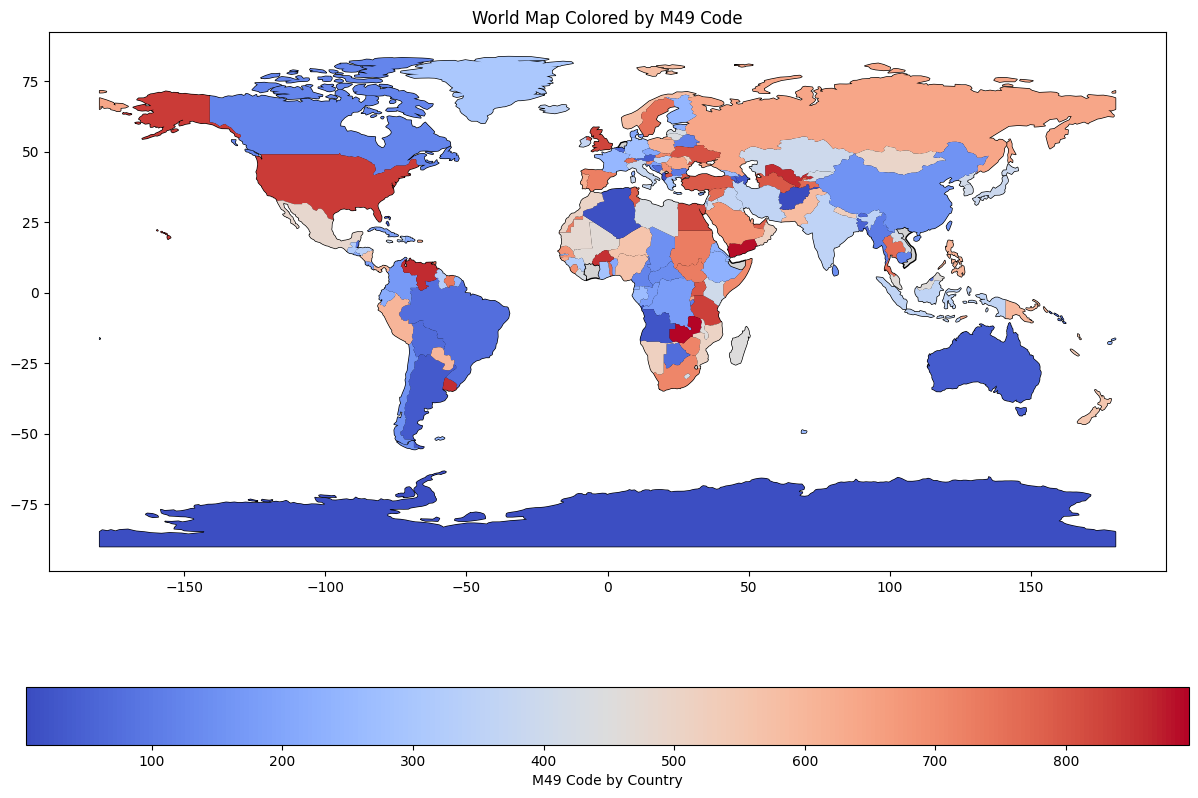

In [62]:
# Merge M49 data using the corrected names
merged = world.merge(df_m49, left_on='Matched Country', right_on='Country or Area', how='left')

# Step 2: Plot the world map with M49 codes
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(ax=ax, color='lightgray', edgecolor='black')  # Base world map

# Plot the correctly matched countries with M49 codes
merged.dropna(subset=['M49 Code']).plot(ax=ax, column='M49 Code', cmap='coolwarm', legend=True,
                                        legend_kwds={'label': "M49 Code by Country",
                                                     'orientation': "horizontal"})

plt.title("World Map Colored by M49 Code")
plt.show()

## 3.2 Count the number of runs per country

In [84]:
# Count the number of 'Run ID' for each 'Country'
df_country_former = df_meta_former.groupby('Country')['Run ID'].nunique().reset_index()

# Rename the columns for clarity
df_country_former.columns = ['Country', 'Run ID Count']

df_country_former

,Country,Run ID Count
0,Australia,24
1,Austria,2
2,Belgium,4
3,Benin,2
4,Bhutan,1
5,Bosnia and Herzegovina,8
6,Brazil,51
7,Cambodia,3
8,Canada,23
9,Chile,3


In [100]:
# Define the cold color levels for the "number of metagenomes"
def get_color(count):
    if pd.isna(count) or count == 0:
        return 'white'  # White color for countries with 0 or NaN run ID count
    elif count <= 10:
        return '#e0f7fa'  # Very light blue (subtle and refined)
    elif count <= 50:
        return '#80deea'  # Light blue with a bit more intensity
    elif count <= 100:
        return '#26c6da'  # Medium light blue with a professional feel
    elif count <= 300:
        return '#0097a7'  # Deep cyan for moderate-high values
    elif count <= 600:
        return '#00796b'  # Dark teal for high values
    else:
        return '#004d40'  # Very dark green-teal for the highest values

In [103]:
! pip3 install geopandas
! pip3 install matplotlib
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [88]:
# Load the world shapefile manually, download from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/
shapefile_path = f'{data_dir}/Map/ne_110m_admin_0_countries.shp'
world = gpd.read_file(shapefile_path)

In [89]:
# Direct match to align country names
world['Matched Country'] = world['ADMIN'].apply(lambda x: x if x in df_m49['Country or Area'].values else None)

In [90]:
# Check which countries were not matched
unmatched_countries = world.loc[world['Matched Country'].isna(), 'ADMIN']
print("Unmatched countries:\n", unmatched_countries)

Unmatched countries:
 18                                  Russia
19                             The Bahamas
20                        Falkland Islands
23     French Southern and Antarctic Lands
24                              East Timor
30                                 Bolivia
40                               Venezuela
60                             Ivory Coast
67                   Republic of the Congo
73                                eSwatini
79                               Palestine
92                                    Laos
94                                 Vietnam
95                             North Korea
96                             South Korea
107                                   Iran
108                                  Syria
116                                Moldova
124                                 Turkey
130                            Netherlands
140                                 Taiwan
143                         United Kingdom
149                             

In [91]:
# Manual corrections for known mismatches
manual_corrections = {
    "Russia": "Russian Federation",
    "The Bahamas": "Bahamas",
    "Falkland Islands": "Falkland Islands (Malvinas)",
    "French Southern and Antarctic Lands": "French Southern Territories",
    "East Timor": "Timor-Leste",
    "Bolivia": "Bolivia (Plurinational State of)",
    "Venezuela": "Venezuela (Bolivarian Republic of)",
    "Ivory Coast": "Côte d'Ivoire",
    "Republic of the Congo": "Congo",
    "Palestine": "State of Palestine",
    "Laos": "Lao People's Democratic Republic",
    "North Korea": "Democratic People's Republic of Korea",
    "South Korea": "Republic of Korea",
    "Iran": "Iran (Islamic Republic of)",
    "Syria": "Syrian Arab Republic",
    "Moldova": "Republic of Moldova",
    "Turkey": "Türkiye",
    "Netherlands": "Netherlands",  # Already correct in M49
    "Taiwan": "China",
    "United Kingdom": "United Kingdom of Great Britain and Northern Ireland",
    "Brunei": "Brunei Darussalam",
    "Northern Cyprus": "Cyprus",  # Not recognized by M49
    # "Somaliland": None,  # Not recognized by M49
    "Republic of Serbia": "Serbia",
    # "Kosovo": None,  # Not recognized by M49
}
# Apply manual corrections
world['Matched Country'] = world['ADMIN'].replace(manual_corrections)

In [92]:
# Merge the world map with correctly matched country name with df_country_former
map_former = world.set_index('Matched Country').join(df_country_former.set_index('Country'))

In [101]:
# Apply color based on the 'Run ID Count'
map_former['Color'] = map_former['Run ID Count'].apply(get_color)

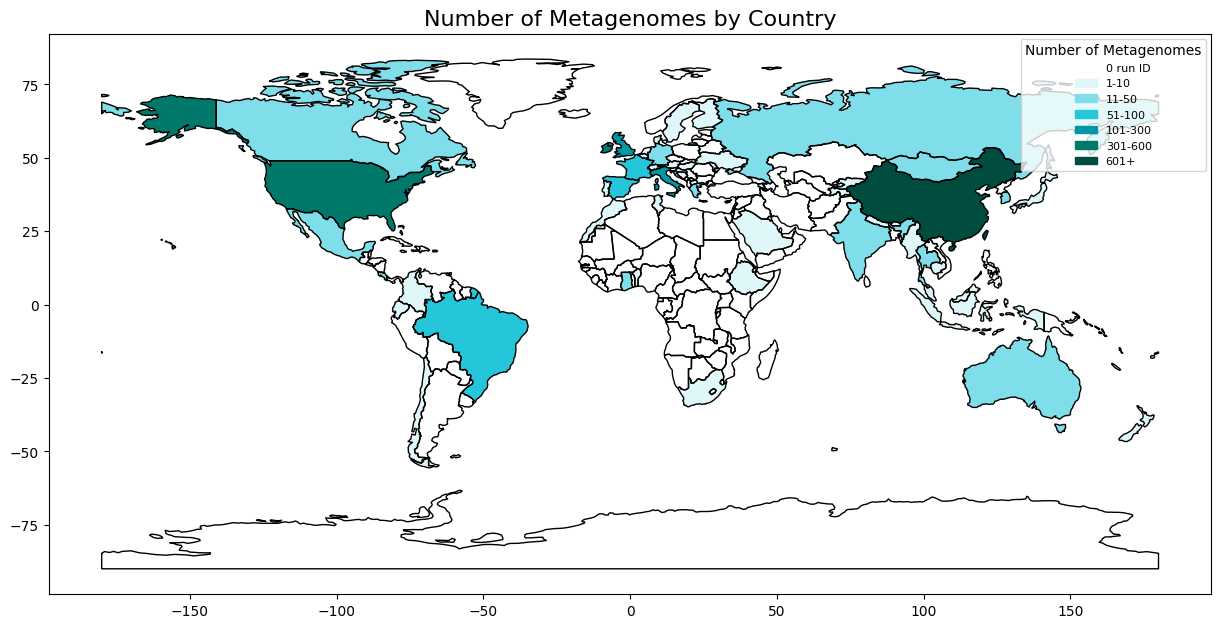

In [105]:
# Plot the world map with colors based on the 'Run ID Count'
fig, ax = plt.subplots(figsize=(15, 10))
map_former.boundary.plot(ax=ax, linewidth=1, color='black')
map_former.plot(ax=ax, color=map_former['Color'], legend=True)

# Create a custom color legend
legend_labels = ['0 run ID', '1-10', '11-50', '51-100', '101-300', '301-600', '601+']
legend_colors = ['white', '#e0f7fa', '#80deea', '#26c6da', '#0097a7', '#00796b', '#004d40']
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]

# Add the legend to the plot
plt.legend(handles=legend_patches, title="Number of Metagenomes", loc='upper right', fontsize=8)

# Add a title and show the plot
plt.title("Number of Metagenomes by Country", fontsize=16)
plt.show()

# 4. Validate for all new metagenome files

## 4.1 Merge all new internal metadata from metagenomes

In [106]:
# Define the paths to folders with new internal metadata
data_dir = os.path.join(data_dir, "internal_metadata", "metagenomes")
folder_paths = [f'{data_dir}/Illumina', f'{data_dir}/Ion Torrent']

In [156]:
# Initialize an empty list to store the dataframes
dfs = []

# Loop over each folder and read all .tsv files
for folder in folder_paths:
    for file in os.listdir(folder):
        if file.endswith('.tsv'):
            file_path = os.path.join(folder, file)
            # Read the .tsv file into a DataFrame and append to the list
            df = pd.read_csv(file_path, sep='\t', encoding='ISO-8859-1', skip_blank_lines=True)
            dfs.append(df)

# Concatenate all DataFrames into one
df_meta_new = pd.concat(dfs, ignore_index=True)

df_meta_new

,Run ID,Internal ID,Host genome ID1,Host genome ID2,Missing genome count,Food common name,Food subgroup,Food matrix,Food components,Publication,Time series,Experimental food,Sequence type,Starter culture metagenome,Starter culture,Virome nucleic acid,Associated starter culture run ID,Continent,Continent code,Region,Region code,Subregion,Subregion code,Country,Country code,Latitude,Longitude,Collection date,Additives,Fermentation medium,Fermentation pH,Fermentation temperature,Fermentation time,Fermentation vessel,Microbial starter inoculation,Microbial starter preparation,Microbial starter source
0,SRR25393924,NaN,GCF_002263795.3,GCA_040286185.1,NaN,Cecina,Fermented meat,Solid,Cattle,https://doi.org/10.1186/s40168-024-01856-3,False,False,metagenome,False,True,NaN,NaN,Europe,150,Southern Europe,39,NaN,NaN,Spain,724,42.61,-5.56,2020/1/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SRR25393923,NaN,GCF_002263795.3,GCA_040286185.1,NaN,Cecina,Fermented meat,Solid,Cattle,https://doi.org/10.1186/s40168-024-01856-3,False,False,metagenome,False,True,NaN,NaN,Europe,150,Southern Europe,39,NaN,NaN,Spain,724,42.61,-5.56,2020/1/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SRR25393922,NaN,GCF_002263795.3,GCA_040286185.1,NaN,Cecina,Fermented meat,Solid,Cattle,https://doi.org/10.1186/s40168-024-01856-3,False,False,metagenome,False,True,NaN,NaN,Europe,150,Southern Europe,39,NaN,NaN,Spain,724,42.61,-5.56,2020/1/29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SRR25393921,NaN,GCF_002263795.3,GCA_040286185.1,NaN,Cecina,Fermented meat,Solid,Cattle,https://doi.org/10.1186/s40168-024-01856-3,False,False,metagenome,False,True,NaN,NaN,Europe,150,Southern Europe,39,NaN,NaN,Spain,724,42.61,-5.56,2020/1/29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SRR25393920,NaN,GCF_002263795.3,GCA_040286185.1,NaN,Cecina,Fermented meat,Solid,Cattle,https://doi.org/10.1186/s40168-024-01856-3,False,False,metagenome,False,True,NaN,NaN,Europe,150,Southern Europe,39,NaN,NaN,Spain,724,42.61,-5.56,2020/2/14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1957,SRR26215996,NaN,NaN,NaN,NaN,Water Kefir,Fermented beverage,Liquid,NaN,https://doi.org/10.1016/j.cell.2024.07.039,False,False,metagenome,False,True,NaN,NaN,Asia,142,Eastern Asia,30,NaN,NaN,"China, Hong Kong Special Administrative Region",344,NaN,NaN,2020,NaN,NaN,NaN,21,48.0,NaN,NaN,NaN,NaN
1958,ERR2021947,NaN,GCA_042847195.1,GCA_042854195.1,NaN,Water Kefir,Fermented beverage,Liquid,Fig,https://doi.org/10.3389/fmicb.2019.00479,False,False,metagenome,False,True,NaN,ERR2021948,Europe,150,Western Europe,155,NaN,NaN,Belgium,56,50.82,4.40,2014,NaN,"Cane sugar, Fig extract",NaN,21,24.0,glass,15.0,100 ml glass bottles containing 85 ml of water...,"a private individual from Lokeren, Belgium"
1959,ERR2021948,NaN,GCA_042847195.1,GCA_042854195.1,NaN,Water Kefir Grains,Fermented beverage,Solid,Fig,https://doi.org/10.3389/fmicb.2019.00479,False,False,metagenome,True,True,NaN,NaN,Europe,150,Western Europe,155,NaN,NaN,Belgium,56,50.82,4.40,2014,NaN,"Cane sugar, Fig extract",NaN,21,24.0,glass,15.0,100 ml glass bottles containing 85 ml of water...,"a private individual from Lokeren, Belgium"
1960,ERR2021949,NaN,GCA_042847195.1,GCA_042854195.1,NaN,Water Kefir,Fermented beverage,Liquid,Fig,https://doi.org/10.3389/fmicb.2019.00479,False,False,metagenome,False,True,NaN,ERR2021950,Europe,150,Western Europe,155,NaN,NaN,Belgium,56,50.82,4.40,2014,NaN,"Cane sugar, Fig extract",NaN,21,72.0,glass,15.0,100 ml glass bottles containing 85 ml of water...,"a private individual from Lokeren, Belgium"


## 4.2 Validate food categoty

In [108]:
# List of food subgroups according to FermDB, add 'yogurt'
food_subgroups = [
    'acid beverage', 'alcoholic beverage', 'beer', 'cheese', 'dairy product', 
    'fermented cereal', 'fermented fish', 'fermented fruit', 'fermented legumes', 
    'fermented meat', 'fermented roots', 'fermented vegetables', 'wine', 'yogurt'
]

In [157]:
# Filter rows where 'Food subgroup' is not in the list, converting the text to lowercase
df_meta_new[~df_meta_new['Food subgroup'].str.lower().isin([x.lower() for x in food_subgroups])]

,Run ID,Internal ID,Host genome ID1,Host genome ID2,Missing genome count,Food common name,Food subgroup,Food matrix,Food components,Publication,Time series,Experimental food,Sequence type,Starter culture metagenome,Starter culture,Virome nucleic acid,Associated starter culture run ID,Continent,Continent code,Region,Region code,Subregion,Subregion code,Country,Country code,Latitude,Longitude,Collection date,Additives,Fermentation medium,Fermentation pH,Fermentation temperature,Fermentation time,Fermentation vessel,Microbial starter inoculation,Microbial starter preparation,Microbial starter source
63,SRR18334997,NaN,"GCA_030765085.1, GCF_001625215.2, GCA_03464024...","GCA_038502295.1, GCA_042100155.1, GCA_03704333...",Piper nigrum: 2,Mixed Vegetable Pickle,Fermented vegetable,Solid,"Onion, carrot, cauliflower, green beans, locot...",https://doi.org/10.1016/j.foodres.2022.111190,False,False,metagenome,False,False,NaN,NaN,Asia,142,Western Asia,145,NaN,NaN,Saudi Arabia,682,21.50,39.24,2020/7/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,SRR18334998,NaN,"GCF_001625215.2, GCA_034640245.1, GCF_00080110...","GCA_042100155.1, GCA_037043335.1, GCA_01970347...",NaN,Mixed Vegetable Pickle,Fermented vegetable,Solid,"Carrot, cauliflower, radish, tomato, sweet gre...",https://doi.org/10.1016/j.foodres.2022.111191,False,False,metagenome,False,False,NaN,NaN,Asia,142,Western Asia,145,NaN,NaN,Saudi Arabia,682,21.50,39.24,2020/7/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,SRR18334999,NaN,"GCF_001625215.2, GCA_034640245.1, GCF_00080110...","GCA_042100155.1, GCA_037043335.1, GCA_01970347...",NaN,Mixed Vegetable Pickle,Fermented vegetable,Solid,"Carrot, cauliflower, radish, tomato, sweet gre...",https://doi.org/10.1016/j.foodres.2022.111192,False,False,metagenome,False,False,NaN,NaN,Asia,142,Western Asia,145,NaN,NaN,Saudi Arabia,682,21.50,39.24,2020/7/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,SRR18335000,NaN,"GCF_001625215.2, GCA_034640245.1, GCF_00080110...","GCA_042100155.1, GCA_037043335.1, GCA_01970347...",NaN,Mixed Vegetable Pickle,Fermented vegetable,Solid,"Carrot, cauliflower, radish, tomato, sweet gre...",https://doi.org/10.1016/j.foodres.2022.111193,False,False,metagenome,False,False,NaN,NaN,Asia,142,Western Asia,145,NaN,NaN,Saudi Arabia,682,21.50,39.24,2020/7/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,SRR18335001,NaN,"GCF_001625215.2, GCA_034640245.1, GCA_044706935.1","GCA_042100155.1, GCA_037043335.1, GCA_044906145.1",Nigella sativa L.: 2,Mixed Vegetable Pickle,Fermented vegetable,Solid,"Carrot, cauliflower, ginger, black seeds",https://doi.org/10.1016/j.foodres.2022.111194,False,False,metagenome,False,False,NaN,NaN,Asia,142,Western Asia,145,NaN,NaN,Saudi Arabia,682,21.50,39.24,2020/7/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1957,SRR26215996,NaN,NaN,NaN,NaN,Water Kefir,Fermented beverage,Liquid,NaN,https://doi.org/10.1016/j.cell.2024.07.039,False,False,metagenome,False,True,NaN,NaN,Asia,142,Eastern Asia,30,NaN,NaN,"China, Hong Kong Special Administrative Region",344,NaN,NaN,2020,NaN,NaN,NaN,21,48.0,NaN,NaN,NaN,NaN
1958,ERR2021947,NaN,GCA_042847195.1,GCA_042854195.1,NaN,Water Kefir,Fermented beverage,Liquid,Fig,https://doi.org/10.3389/fmicb.2019.00479,False,False,metagenome,False,True,NaN,ERR2021948,Europe,150,Western Europe,155,NaN,NaN,Belgium,56,50.82,4.40,2014,NaN,"Cane sugar, Fig extract",NaN,21,24.0,glass,15.0,100 ml glass bottles containing 85 ml of water...,"a private individual from Lokeren, Belgium"
1959,ERR2021948,NaN,GCA_042847195.1,GCA_042854195.1,NaN,Water Kefir Grains,Fermented beverage,Solid,Fig,https://doi.org/10.3389/fmicb.2019.00479,False,False,metagenome,True,True,NaN,NaN,Europe,150,Western Europe,155,NaN,NaN,Belgium,56,50.82,4.40,2014,NaN,"Cane sugar, Fig extract",NaN,21,24.0,glass,15.0,100 ml glass bottles containing 85 ml of water...,"a private individual from Lokeren, Belgium"

In [158]:
# Replace all occurrences of 'Fermented vegetable' in the 'Food subgroup' column with 'Fermented vegetables'
df_meta_new['Food subgroup'] = df_meta_new['Food subgroup'].replace('Fermented vegetable', 'Fermented vegetables')
df_meta_new['Food subgroup'] = df_meta_new['Food subgroup'].replace('Fermented beverage', 'Acid beverage')

In [159]:
# Filter rows where 'Food subgroup' is not in the list, converting the text to lowercase
df_meta_new[~df_meta_new['Food subgroup'].str.lower().isin([x.lower() for x in food_subgroups])]

,Run ID,Internal ID,Host genome ID1,Host genome ID2,Missing genome count,Food common name,Food subgroup,Food matrix,Food components,Publication,Time series,Experimental food,Sequence type,Starter culture metagenome,Starter culture,Virome nucleic acid,Associated starter culture run ID,Continent,Continent code,Region,Region code,Subregion,Subregion code,Country,Country code,Latitude,Longitude,Collection date,Additives,Fermentation medium,Fermentation pH,Fermentation temperature,Fermentation time,Fermentation vessel,Microbial starter inoculation,Microbial starter preparation,Microbial starter source
252,SRR28523216,NaN,GCF_002263795.3,GCA_040286185.1,NaN,Whey,NaN,NaN,Cow milk,https://doi.org/10.1016/j.cell.2024.07.039,False,False,metagenome,False,True,NaN,NaN,Europe,150,Northern Europe,154,NaN,NaN,Ireland,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,SRR28523215,NaN,GCF_002263795.3,GCA_040286185.1,NaN,Whey,NaN,NaN,Cow milk,https://doi.org/10.1016/j.cell.2024.07.039,False,False,metagenome,False,True,NaN,NaN,Europe,150,Northern Europe,154,NaN,NaN,Ireland,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,SRR28523214,NaN,GCF_002263795.3,GCA_040286185.1,NaN,Whey,NaN,NaN,Cow milk,https://doi.org/10.1016/j.cell.2024.07.039,False,False,metagenome,False,True,NaN,NaN,Europe,150,Northern Europe,154,NaN,NaN,Ireland,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255,SRR28523213,NaN,GCF_002263795.3,GCA_040286185.1,NaN,Whey,NaN,NaN,Cow milk,https://doi.org/10.1016/j.cell.2024.07.039,False,False,metagenome,False,True,NaN,NaN,Europe,150,Northern Europe,154,NaN,NaN,Ireland,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,SRR28523212,NaN,GCF_002263795.3,GCA_040286185.1,NaN,Whey,NaN,NaN,Cow milk,https://doi.org/10.1016/j.cell.2024.07.039,False,False,metagenome,False,True,NaN,NaN,Europe,150,Northern Europe,154,NaN,NaN,Ireland,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347,SRR25395105,NaN,GCF_002263795.3,GCA_040286185.1,NaN,Whey,,,Cow milk,https://doi.org/10.1016/j.cell.2024.07.039,False,False,metagenome,False,True,NaN,NaN,Europe,150,Southern Europe,39,NaN,NaN,Spain,724,43.47,-5.44,2020/3/4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1356,SRR25395344,NaN,GCF_002263795.3,GCA_040286185.1,NaN,Whey,,,Cow milk,https://doi.org/10.1016/j.cell.2024.07.039,False,False,metagenome,False,True,NaN,NaN,Europe,150,Southern Europe,39,NaN,NaN,Spain,724,43.47,-5.44,2020/2/25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1366,SRR25394806,NaN,GCF_002263795.3,GCA_040286185.1,NaN,Whey,,,Cow milk,https://doi.org/10.1016/j.cell.2024.07.039,False,False,metagenome,False,True,NaN,NaN,Europe,150,Southern Europe,39,NaN,NaN,Spain,724,43.47,-5.44,2020/2/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1376,SRR2219805,NaN,GCF_030704535.1,NaN,Corvina: 1,grape berry,NaN,Solid,grapevine,https://doi.org/10.3389/fmicb.2016.00937,False,False,metagenome,False,True,NaN,NaN,Europe,150,Southern Europe,39,NaN,NaN,Italy,380,45.52,10.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


didn't deal with whey

In [160]:
# Remove leading/trailing spaces/tabs
df_meta_new = df_meta_new.apply(lambda x: x.astype(str).str.strip() if x.dtype == "object" else x)

haven't removed cruded meat from Spain

## 4.3 Validate country and region information

In [161]:
# Step 1: Create a list to store unmatched countries
unmatched_countries = []

# Step 2: Iterate over df_meta_new to check and correct mismatches
for idx, meta_row in df_meta_new.iterrows():
    # Find the matching row in df_m49 for the Country
    matched_row = df_m49[df_m49['Country or Area'] == meta_row['Country']]
    
    if matched_row.empty:
        unmatched_countries.append(meta_row['Country'])  # Store unmatched country names
        continue  # Skip correction if country is not found
    
    matched_row = matched_row.iloc[0]  # Extract the first matched row

    # Step 3: Directly correct mismatched values
    df_meta_new.at[idx, 'Country code'] = matched_row['M49 Code']
    
    if not nan_equal(meta_row['Subregion code'], matched_row['Intermediate Region Code']):
        df_meta_new.at[idx, 'Subregion code'] = matched_row['Intermediate Region Code']
    
    if not nan_equal(meta_row['Subregion'], matched_row['Intermediate Region Name']):
        df_meta_new.at[idx, 'Subregion'] = matched_row['Intermediate Region Name']
    
    df_meta_new.at[idx, 'Region code'] = matched_row['Sub-region Code']
    df_meta_new.at[idx, 'Region'] = matched_row['Sub-region Name']
    
    df_meta_new.at[idx, 'Continent code'] = matched_row['Region Code']
    df_meta_new.at[idx, 'Continent'] = matched_row['Region Name']

# Step 4: Print unmatched country names
if unmatched_countries:
    print("Unmatched countries in df_meta_new:", unmatched_countries)
else:
    print("All countries in df_meta_new matched successfully!")


Unmatched countries in df_meta_new: ['\x81land Islands', '\x81land Islands', '\x81land Islands', '\x81land Islands']


In [162]:
# Correct the encoding issue
df_meta_new['Country'] = df_meta_new['Country'].replace('\x81land Islands', 'Åland Islands')

In [163]:
# Step 1: Create a list to store unmatched countries
unmatched_countries = []

# Step 2: Iterate over df_meta_new to check and correct mismatches
for idx, meta_row in df_meta_new.iterrows():
    # Find the matching row in df_m49 for the Country
    matched_row = df_m49[df_m49['Country or Area'] == meta_row['Country']]
    
    if matched_row.empty:
        unmatched_countries.append(meta_row['Country'])  # Store unmatched country names
        continue  # Skip correction if country is not found
    
    matched_row = matched_row.iloc[0]  # Extract the first matched row

    # Step 3: Directly correct mismatched values
    df_meta_new.at[idx, 'Country code'] = matched_row['M49 Code']
    
    if not nan_equal(meta_row['Subregion code'], matched_row['Intermediate Region Code']):
        df_meta_new.at[idx, 'Subregion code'] = matched_row['Intermediate Region Code']
    
    if not nan_equal(meta_row['Subregion'], matched_row['Intermediate Region Name']):
        df_meta_new.at[idx, 'Subregion'] = matched_row['Intermediate Region Name']
    
    df_meta_new.at[idx, 'Region code'] = matched_row['Sub-region Code']
    df_meta_new.at[idx, 'Region'] = matched_row['Sub-region Name']
    
    df_meta_new.at[idx, 'Continent code'] = matched_row['Region Code']
    df_meta_new.at[idx, 'Continent'] = matched_row['Region Name']

# Step 4: Print unmatched country names
if unmatched_countries:
    print("Unmatched countries in df_meta_new:", unmatched_countries)
else:
    print("All countries in df_meta_new matched successfully!")


All countries in df_meta_new matched successfully!


# 5. Draw world map with validated data

## 5.2 Count the number of runs per country

In [165]:
# Count the number of 'Run ID' for each 'Country'
df_country_new = df_meta_new.groupby('Country')['Run ID'].nunique().reset_index()

# Rename the columns for clarity
df_country_new.columns = ['Country', 'Run ID Count']

df_country_new

,Country,Run ID Count
0,Australia,18
1,Austria,230
2,Belgium,32
3,Brazil,14
4,Bulgaria,8
5,Burkina Faso,4
6,Canada,19
7,China,63
8,"China, Hong Kong Special Administrative Region",5
9,Colombia,5


In [203]:
# list the new counties compare to df_country_former
new_countries = set(df_country_new['Country']) - set(df_country_former['Country'])
new_countries = sorted(new_countries)
new_countries

['Bulgaria',
 'Burkina Faso',
 'China, Hong Kong Special Administrative Region',
 'Estonia',
 'Kenya',
 'Nigeria',
 'Norway',
 'Philippines',
 'Åland Islands']

In [ ]:
# list their contient
df_m49.loc[df_m49["Country or Area"].isin(new_countries), "Region Name"]

14     Africa
44     Africa
55     Africa
124      Asia
136      Asia
169    Europe
178    Europe
180    Europe
190    Europe
Name: Region Name, dtype: object

In [213]:
# output by the oder
df_country_new=df_country_new.sort_values(by="Run ID Count", ascending=False)
df_country_new

,Country,Run ID Count
37,Spain,446
21,Italy,402
1,Austria,230
19,Ireland,92
41,United Kingdom of Great Britain and Northern I...,91
28,Nigeria,74
14,Germany,74
7,China,63
13,France,58
42,United States of America,52


/var/folders/pd/s71ldfz102g17fmv0mgf1tc40000gn/T/ipykernel_1425/1300541325.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country_top10["Country"] = df_country_top10["Country"].apply(


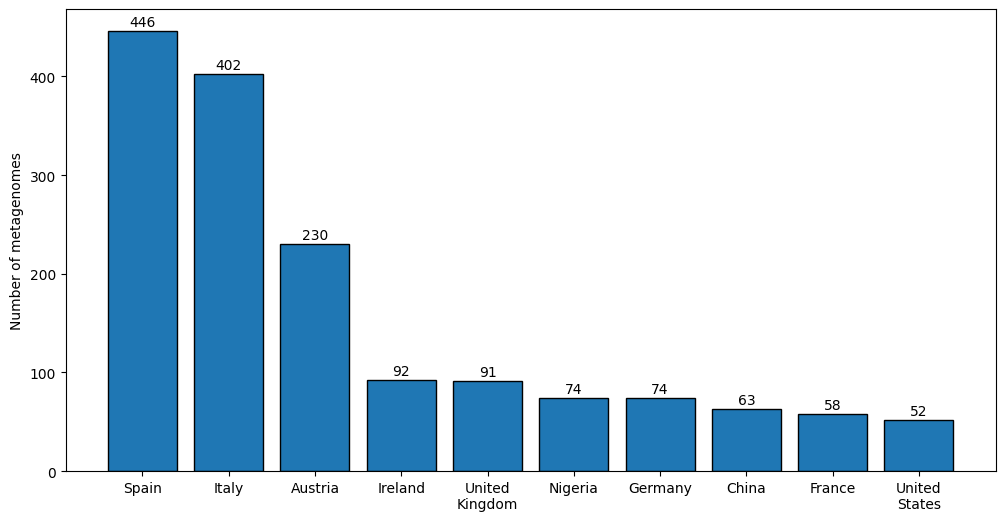

In [217]:
# Select the top 10 countries
df_country_top10 = df_country_new.head(10)

# Wrap long country names into two lines
df_country_top10["Country"] = df_country_top10["Country"].apply(
    lambda x: '\n'.join(x.split(' ', 2)[:2]) if len(x) > 15 else x
)

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(df_country_top10["Country"], df_country_top10["Run ID Count"], color="#1f77b4", edgecolor="black")

# Add value labels on top of each bar
for i, v in enumerate(df_country_top10["Run ID Count"]):
    ax.text(i, v + 5, str(v), ha='center', fontsize=10)

# Customize the plot
ax.set_ylabel("Number of metagenomes")
plt.xticks(rotation=0, ha="center", fontsize=10)  # Keep labels horizontal
plt.show()

In [166]:
# Merge the two dataframes on 'Country' with outer join to keep all countries
df_country_all = pd.merge(df_country_new, df_country_former, on='Country', how='outer', suffixes=('_country', '_country_former'))

# Fill NaN values in 'Run ID Count' columns with 0
df_country_all['Run ID Count_country'].fillna(0, inplace=True)
df_country_all['Run ID Count_country_former'].fillna(0, inplace=True)

# Add the 'Run ID Count' from both dataframes
df_country_all['Total Run ID Count'] = df_country_all['Run ID Count_country'] + df_country_all['Run ID Count_country_former']

# Convert the 'Total Run ID Count' to integer (if appropriate)
df_country_all['Total Run ID Count'] = df_country_all['Total Run ID Count'].astype(int)

# Drop the individual Run ID Count columns
df_country_all.drop(columns=['Run ID Count_country', 'Run ID Count_country_former'], inplace=True)

# Display the final merged dataframe
df_country_all


/var/folders/pd/s71ldfz102g17fmv0mgf1tc40000gn/T/ipykernel_1425/3755170663.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_country_all['Run ID Count_country'].fillna(0, inplace=True)
/var/folders/pd/s71ldfz102g17fmv0mgf1tc40000gn/T/ipykernel_1425/3755170663.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

,Country,Total Run ID Count
0,Australia,42
1,Austria,232
2,Belgium,36
3,Benin,2
4,Bhutan,1
...,...,...
58,Turkey,13
59,Ukraine,9
60,United Kingdom of Great Britain and Northern I...,197
61,United States of America,353


## 5.3 Draw world map with color hierachy

In [121]:
# Define the cold color levels for the "number of metagenomes"
def get_color(count):
    if pd.isna(count) or count == 0:
        return 'white'  # White color for countries with 0 or NaN run ID count
    elif count <= 10:
        return '#e0f7fa'  # Very light blue (subtle and refined)
    elif count <= 50:
        return '#80deea'  # Light blue with a bit more intensity
    elif count <= 100:
        return '#26c6da'  # Medium light blue with a professional feel
    elif count <= 300:
        return '#0097a7'  # Deep cyan for moderate-high values
    elif count <= 600:
        return '#00796b'  # Dark teal for high values
    else:
        return '#004d40'  # Very dark green-teal for the highest values

In [129]:
# Merge the world map with correctly matched country name with df_country_former
map = world.set_index('Matched Country').join(df_country_all.set_index('Country'))

In [131]:
# Apply color based on the 'Run ID Count'
map['Color'] = map['Total Run ID Count'].apply(get_color)

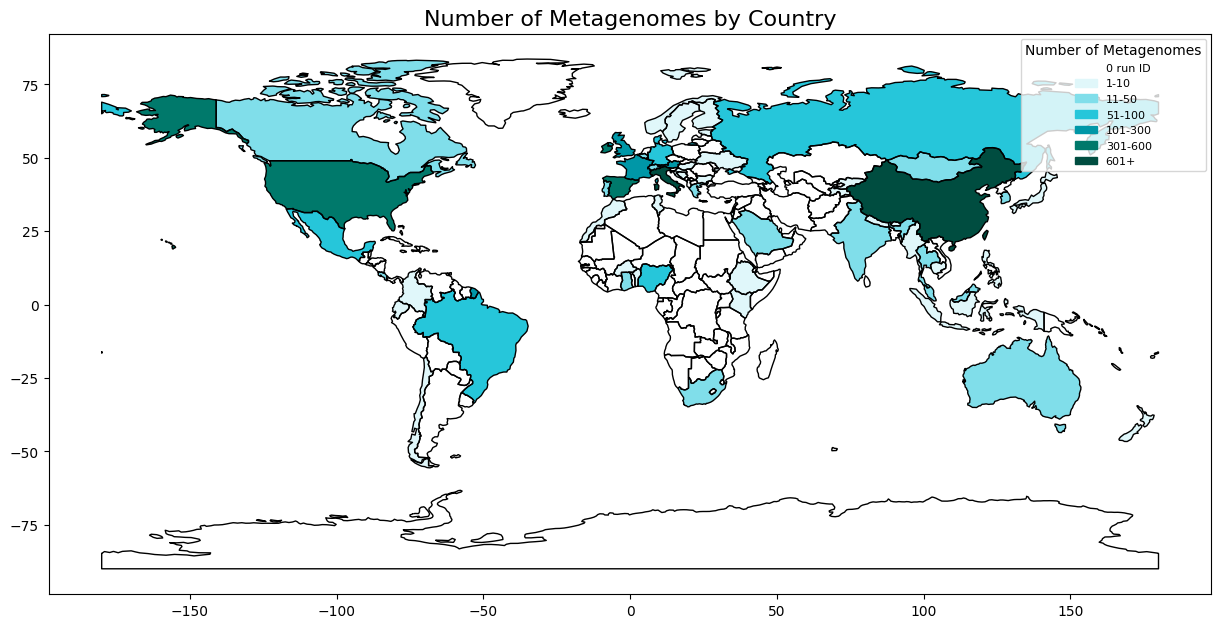

In [132]:
# Plot the world map with colors based on the 'Run ID Count'
fig, ax = plt.subplots(figsize=(15, 10))
map.boundary.plot(ax=ax, linewidth=1, color='black')
map.plot(ax=ax, color=map['Color'], legend=True)

# Create a custom color legend
legend_labels = ['0 run ID', '1-10', '11-50', '51-100', '101-300', '301-600', '601+']
legend_colors = ['white', '#e0f7fa', '#80deea', '#26c6da', '#0097a7', '#00796b', '#004d40']
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]

# Add the legend to the plot
plt.legend(handles=legend_patches, title="Number of Metagenomes", loc='upper right', fontsize=8)

# Add a title and show the plot
plt.title("Number of Metagenomes by Country", fontsize=16)
plt.show()

## 5.4 Draw world map with color gradient

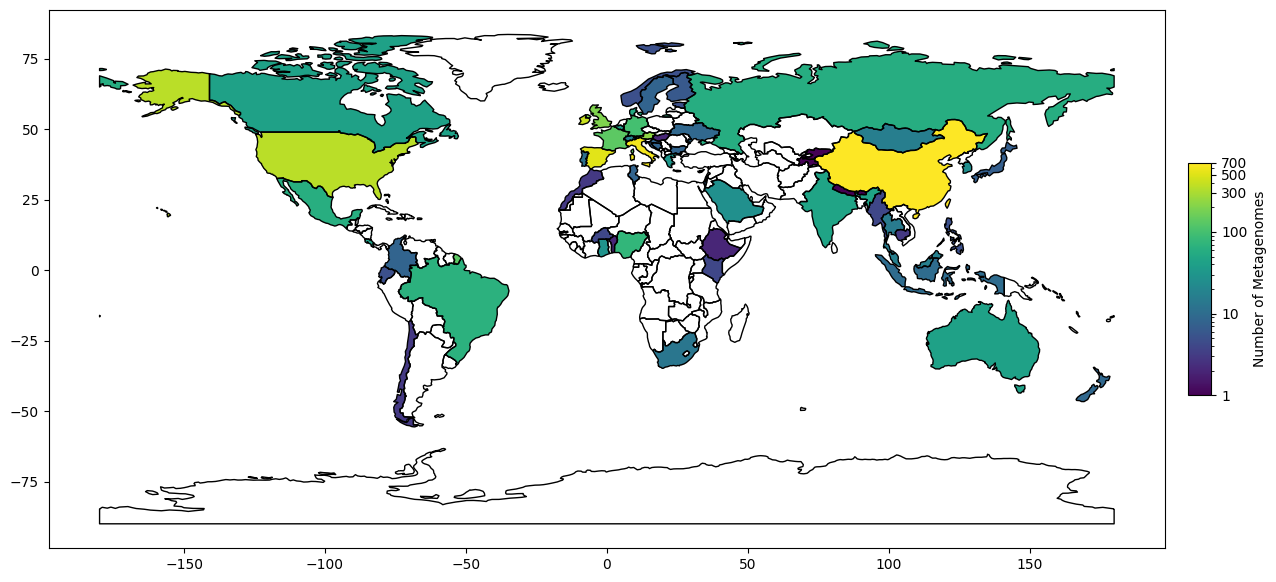

In [202]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LogNorm
from matplotlib.cm import ScalarMappable
import numpy as np

# Define the color levels with a finer gradient using LogNorm
def get_color(count, min_count, max_count):
    if pd.isna(count) or count == 0:
        return 'white'  # White color for countries with 0 or NaN run ID count
    
    # Use LogNorm for better contrast
    norm = LogNorm(vmin=min_count, vmax=max_count)
    cmap = plt.get_cmap('viridis')  # 'viridis' provides better contrast
    
    return cmap(norm(count))

# Merge the world map with correctly matched country name with df_country_all
map = world.set_index('Matched Country').join(df_country_all.set_index('Country'))

# Find min and max values for the 'Total Run ID Count'
min_count = map['Total Run ID Count'].min()
max_count = map['Total Run ID Count'].max()

# Apply the get_color function to determine the color based on gradient
map['Color'] = map['Total Run ID Count'].apply(lambda x: get_color(x, min_count, max_count))

# Plot the world map with colors based on 'Run ID Count'
fig, ax = plt.subplots(figsize=(15, 10))
map.boundary.plot(ax=ax, linewidth=1, color='black')
map.plot(ax=ax, color=map['Color'])

# Create a custom color legend using ScalarMappable
sm = ScalarMappable(cmap='viridis', norm=LogNorm(vmin=min_count, vmax=max_count))
sm.set_array([])  # Empty array to avoid extra dimension

# Define custom ticks
colorbar_ticks = [1, 10, 100, 300, 500, 700]
cbar = plt.colorbar(sm, ax=ax, fraction=0.02, pad=0.02, aspect=10, location='right')
cbar.set_ticks(colorbar_ticks)
cbar.set_ticklabels([str(tick) for tick in colorbar_ticks])  # Format ticks as normal numbers
cbar.set_label('Number of Metagenomes')

# Add a title and show the plot
#plt.title("Number of Metagenomes by Country", fontsize=16)
plt.show()


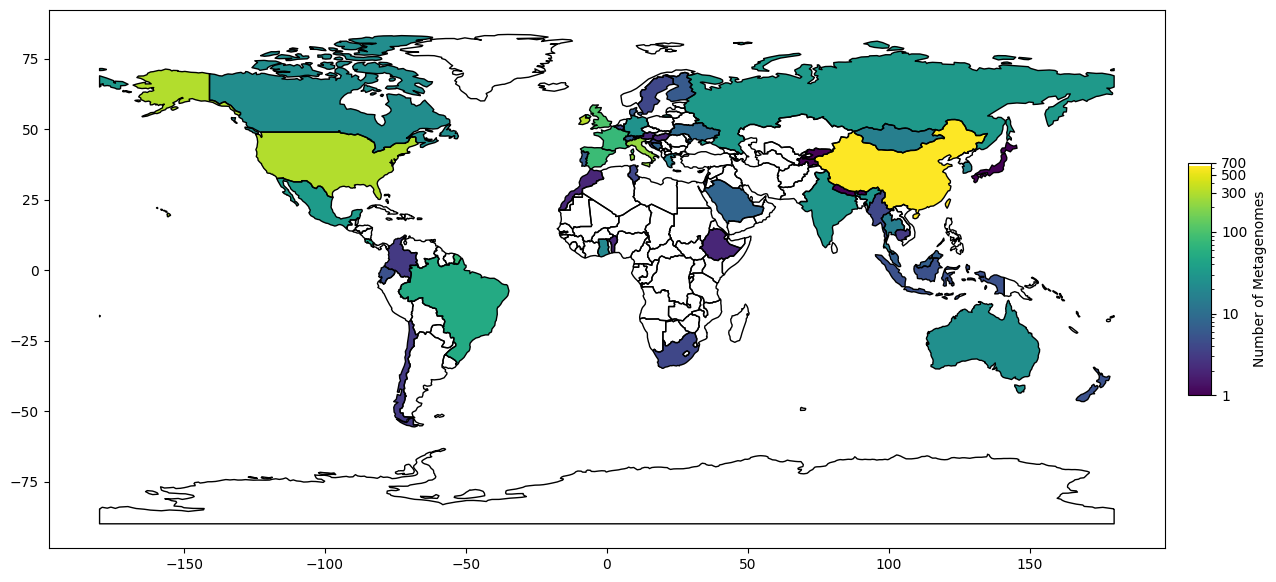

In [201]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LogNorm
from matplotlib.cm import ScalarMappable

# Define the color levels with a finer gradient between 1 and 100 using LogNorm
def get_color(count, min_count, max_count):
    if pd.isna(count) or count == 0:
        return 'white'  # White color for countries with 0 or NaN run ID count
    
    # Use LogNorm to compress the range and provide more contrast for lower values
    norm = LogNorm(vmin=min_count, vmax=max_count)
    cmap = plt.get_cmap('viridis')  # Using 'viridis' for better contrast
    
    # Return the color corresponding to the normalized count
    return cmap(norm(count))

# Merge the world map with correctly matched country name with df_country_former
map = world.set_index('Matched Country').join(df_country_former.set_index('Country'))

# Find min and max values for the 'Run ID Count'
min_count = map['Run ID Count'].min()
max_count = map['Run ID Count'].max()

# Apply the get_color function to each row to determine the color based on the gradient
map['Color'] = map['Run ID Count'].apply(lambda x: get_color(x, min_count, max_count))

# Plot the world map with colors based on the 'Run ID Count'
fig, ax = plt.subplots(figsize=(15, 10))
map.boundary.plot(ax=ax, linewidth=1, color='black')
map.plot(ax=ax, color=map['Color'])

# Create a custom color legend using ScalarMappable
sm = ScalarMappable(cmap='viridis', norm=LogNorm(vmin=min_count, vmax=max_count))
sm.set_array([])  # Empty array to avoid extra dimension

# Define custom ticks
colorbar_ticks = [1, 10, 100, 300, 500, 700]
cbar = plt.colorbar(sm, ax=ax, fraction=0.02, pad=0.02, aspect=10, location='right')
cbar.set_ticks(colorbar_ticks)
cbar.set_ticklabels([str(tick) for tick in colorbar_ticks])  # Format ticks as normal numbers
cbar.set_label('Number of Metagenomes')

# Add a title and show the plot
#plt.title("Number of Metagenomes by Country", fontsize=16)
plt.show()


## 5.5 list the new countries and their 

# 6. Food category bar plot comparision

In [183]:
# Function to capitalize the second word's first letter in the 'Food subgroup' column
def capitalize_second_word(food_subgroup):
    words = food_subgroup.split()
    if len(words) > 1:
        words[1] = words[1].capitalize()  # Capitalize the first letter of the second word
    return ' '.join(words)

In [184]:
# Apply the capitalization function to both df_meta_former and df_meta_new
df_meta_former['Food subgroup'] = df_meta_former['Food subgroup'].apply(capitalize_second_word)
df_meta_new['Food subgroup'] = df_meta_new['Food subgroup'].apply(capitalize_second_word)

In [185]:
# Merge former and new metadata into df_meta_all
df_meta_all = pd.concat([df_meta_former, df_meta_new], ignore_index=True)

In [208]:
df_meta_all

,Run ID,Internal ID,Host genome ID1,Host genome ID2,Missing genome count,Food common name,Food subgroup,Food matrix,Food components,Publication,Time series,Experimental food,Sequence type,Starter culture metagenome,Starter culture,Virome nucleic acid,Associated starter culture run ID,Continent,Continent code,Region,Region code,Subregion,Subregion code,Country,Country code,Latitude,Longitude,Collection date,Additives,Fermentation medium,Fermentation pH,Fermentation temperature,Fermentation time,Fermentation vessel,Microbial starter inoculation,Microbial starter preparation,Microbial starter source
0,SRR18055254,NaN,"GCF_000004515.6, GCF_018294505.1","GCA_033623075.1, GCA_002220415.3",NaN,Soy sauce,Fermented Legumes,Liquid,"Soybean, Wheat",https://doi.org/10.3389/fmicb.2022.976206,True,False,metagenome,False,True,NaN,NaN,Asia,142,Eastern Asia,30,NaN,NaN,China,156,22.68,113.27,20-Mar,NaCl:18,NaN,NaN,20.0,1440.0,NaN,NaN,NaN,NaN
1,SRR18055255,NaN,"GCF_000004515.6, GCF_018294505.1","GCA_033623075.1, GCA_002220415.3",NaN,Soy sauce,Fermented Legumes,Liquid,"Soybean, Wheat",https://doi.org/10.3389/fmicb.2022.976206,True,False,metagenome,False,True,NaN,NaN,Asia,142,Eastern Asia,30,NaN,NaN,China,156,22.68,113.27,20-Mar,NaCl:18,NaN,NaN,20.0,720.0,NaN,NaN,NaN,NaN
2,SRR18055256,NaN,"GCF_000004515.6, GCF_018294505.1","GCA_033623075.1, GCA_002220415.3",NaN,Soy sauce,Fermented Legumes,Liquid,"Soybean, Wheat",https://doi.org/10.3389/fmicb.2022.976206,True,False,metagenome,False,True,NaN,NaN,Asia,142,Eastern Asia,30,NaN,NaN,China,156,22.68,113.27,20-Mar,NaCl:18,NaN,NaN,20.0,360.0,NaN,NaN,NaN,NaN
3,SRR18055257,NaN,"GCF_000004515.6, GCF_018294505.1","GCA_033623075.1, GCA_002220415.3",NaN,Soy sauce,Fermented Legumes,Liquid,"Soybean, Wheat",https://doi.org/10.3389/fmicb.2022.976206,True,False,metagenome,False,True,NaN,NaN,Asia,142,Eastern Asia,30,NaN,NaN,China,156,22.68,113.27,20-Mar,NaCl:18,NaN,NaN,20.0,168.0,NaN,NaN,NaN,NaN
4,SRR18055258,NaN,"GCF_000004515.6, GCF_018294505.1","GCA_033623075.1, GCA_002220415.3",NaN,Soy sauce,Fermented Legumes,Liquid,"Soybean, Wheat",https://doi.org/10.3389/fmicb.2022.976206,True,False,metagenome,False,True,NaN,NaN,Asia,142,Eastern Asia,30,NaN,NaN,China,156,22.68,113.27,20-Mar,NaCl:18,NaN,NaN,25.0,2880.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4191,SRR26215996,NaN,nan,nan,nan,Water Kefir,Acid Beverage,Liquid,nan,https://doi.org/10.1016/j.cell.2024.07.039,False,False,metagenome,False,True,NaN,nan,Asia,142,Eastern Asia,30,NaN,NaN,"China, Hong Kong Special Administrative Region",344,NaN,NaN,2020,nan,nan,NaN,21,48.0,nan,NaN,nan,nan
4192,ERR2021947,NaN,GCA_042847195.1,GCA_042854195.1,nan,Water Kefir,Acid Beverage,Liquid,Fig,https://doi.org/10.3389/fmicb.2019.00479,False,False,metagenome,False,True,NaN,ERR2021948,Europe,150,Western Europe,155,NaN,NaN,Belgium,56,50.82,4.40,2014,nan,"Cane sugar, Fig extract",NaN,21,24.0,glass,15.0,100 ml glass bottles containing 85 ml of water...,"a private individual from Lokeren, Belgium"
4193,ERR2021948,NaN,GCA_042847195.1,GCA_042854195.1,nan,Water Kefir Grains,Acid Beverage,Solid,Fig,https://doi.org/10.3389/fmicb.2019.00479,False,False,metagenome,True,True,NaN,nan,Europe,150,Western Europe,155,NaN,NaN,Belgium,56,50.82,4.40,2014,nan,"Cane sugar, Fig extract",NaN,21,24.0,glass,15.0,100 ml glass bottles containing 85 ml of water...,"a private individual from Lokeren, Belgium"
4194,ERR2021949,NaN,GCA_042847195.1,GCA_042854195.1,nan,Water Kefir,Acid Beverage,Liquid,Fig,https://doi.org/10.3389/fmicb.2019.00479,False,False,metagenome,False,True,NaN,ERR2021950,Europe,150,Western Europe,155,NaN,NaN,Belgium,56,50.82,4.40,2014,nan,"Cane sugar, Fig extract",NaN,21,72.0,glass,15.0,100 ml glass bottles containing 85 ml of water...,"a private individual from Lokeren, Belgium"


In [190]:
# Count Run ID occurrences per Food subgroup
df_former_counts = df_meta_former.groupby('Food subgroup')['Run ID'].count()
df_all_counts = df_meta_all.groupby('Food subgroup')['Run ID'].count()

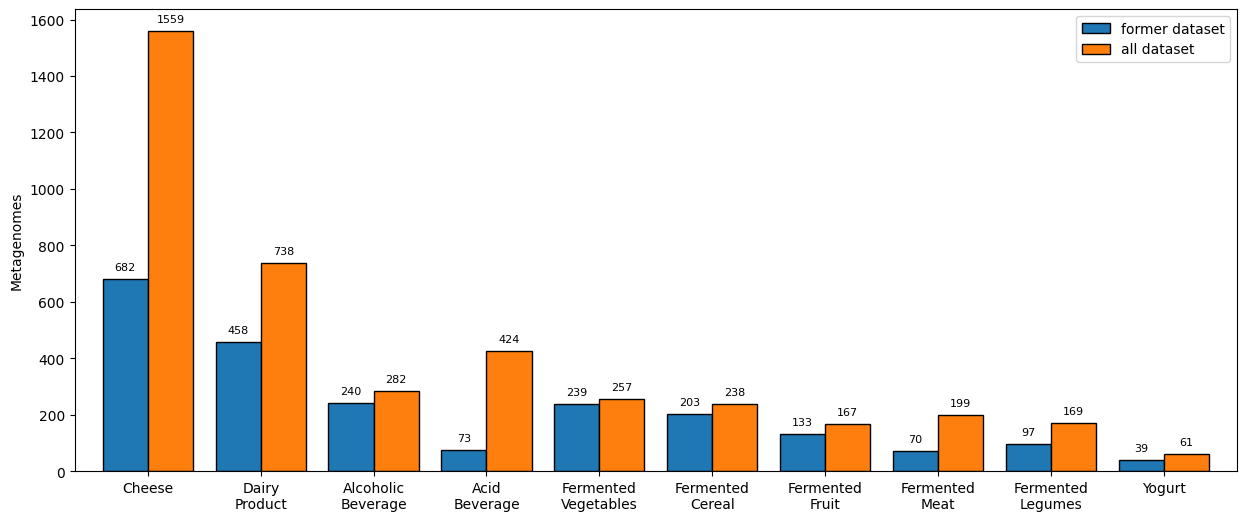

In [199]:
# Create a DataFrame to hold both counts
df_comparison = pd.DataFrame({
    'df_meta_former': df_former_counts,
    'df_meta_all': df_all_counts})

# Remove NaN values from the dataframe
df_comparison = df_comparison.dropna()

# Sort the values by the sum of the counts (in descending order)
df_comparison['Total'] = df_comparison.sum(axis=1)
df_comparison_sorted = df_comparison.sort_values(by='Total', ascending=False)

# Plot the sorted bar chart with wider bars
fig, ax = plt.subplots(figsize=(15, 6))
df_comparison_sorted[['df_meta_former', 'df_meta_all']].plot(kind='bar', ax=ax, color=['#1f77b4', '#ff7f0e'], edgecolor='black', width=0.8)

# Add numbers on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                xytext=(0, 5),  # 5 points vertical offset
                textcoords='offset points',
                ha='center', 
                va='bottom', 
                fontsize=8)

# Customize the plot
ax.set_ylabel('Metagenomes')
ax.legend(['former dataset', 'all dataset'])
ax.set_xlabel('') 
# Split X-axis labels into two lines (if long) and keep them horizontal
labels = [label.get_text() for label in ax.get_xticklabels()]
new_labels = []
for label in labels:
    # If the label has more than one word, split it into two lines
    if len(label.split()) > 1:
        new_labels.append(label.replace(' ', '\n'))  # Split by space to add a new line
    else:
        new_labels.append(label)

# Set new X-tick labels, keep them horizontal
ax.set_xticklabels(new_labels, ha='center', fontsize=10, rotation=0)

# Show the plot
plt.show()